# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: **апартаменты** — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
#сделаем, что бы было видно все колонки и удобный формат цифр
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11095,7,"4,800,000.00",43.50,2018-06-23T00:00:00,2,2.50,9.00,26.90,1,NaN,False,False,8.10,nan,Санкт-Петербург,"40,173.00","11,876.00",1.00,848.00,0.00,nan,nan
11030,17,"3,429,000.00",43.30,2018-02-28T00:00:00,1,2.75,9.00,18.70,1,NaN,False,False,10.40,nan,Сертолово,nan,nan,nan,nan,nan,nan,127.00
9696,11,"850,000.00",52.00,2019-02-26T00:00:00,2,nan,5.00,30.00,4,NaN,False,False,9.00,1.00,деревня Торошковичи,nan,nan,nan,nan,nan,nan,nan
18002,18,"3,200,000.00",33.00,2018-09-10T00:00:00,1,nan,9.00,18.00,7,NaN,False,False,6.00,nan,Санкт-Петербург,"15,481.00","11,049.00",0.00,nan,0.00,nan,6.00
3615,3,"4,600,000.00",52.40,2017-12-09T00:00:00,2,3.00,5.00,33.00,5,NaN,False,False,8.30,1.00,Санкт-Петербург,"43,397.00","8,370.00",2.00,522.00,0.00,nan,314.00
17714,12,"8,350,000.00",79.00,2017-06-15T00:00:00,3,2.90,6.00,43.80,2,NaN,False,False,12.00,0.00,Санкт-Петербург,"26,036.00","4,883.00",1.00,622.00,1.00,405.00,15.00
14460,20,"3,600,000.00",35.50,2017-05-30T00:00:00,1,2.60,9.00,18.50,8,False,False,False,6.90,1.00,Санкт-Петербург,"14,212.00","13,009.00",1.00,814.00,1.00,626.00,134.00
10053,1,"6,750,000.00",79.00,2015-12-15T00:00:00,3,3.20,3.00,52.00,2,NaN,False,False,10.00,nan,Санкт-Петербург,"27,705.00","9,593.00",0.00,nan,2.00,841.00,"1,161.00"
17335,18,"4,600,000.00",49.00,2017-12-12T00:00:00,2,2.50,9.00,38.50,2,NaN,False,False,7.00,1.00,Санкт-Петербург,"49,968.00","16,623.00",0.00,nan,0.00,nan,298.00
13994,11,"9,500,000.00",89.00,2018-08-20T00:00:00,3,3.50,6.00,58.30,2,NaN,False,False,10.20,nan,Санкт-Петербург,"24,660.00","5,228.00",1.00,540.00,0.00,nan,133.00


In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [6]:
#посмотрим пропущенные значения
df.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [7]:
#посмотрим пропущенные значения в процентах
df.isnull().sum().sort_values() / df.shape[0] * 100

total_images            0.00
open_plan               0.00
floor                   0.00
rooms                   0.00
studio                  0.00
total_area              0.00
last_price              0.00
first_day_exposition    0.00
locality_name           0.21
floors_total            0.36
living_area             8.03
kitchen_area            9.61
days_exposition        13.42
ponds_around3000       23.28
parks_around3000       23.28
cityCenters_nearest    23.29
airports_nearest       23.38
ceiling_height         38.80
balcony                48.61
ponds_nearest          61.56
parks_nearest          65.91
is_apartment           88.29
dtype: float64

In [8]:
#проверим наличие дубликатов
df.duplicated().sum()

0

### Вывод

- Отсутствуют очень много значений
- не логичные названия столбцов и разный регистр 
- группировка столбцов оставляет желать лучшего
- не корректные типы данных

### Шаг 2. Предобработка данных

In [9]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [10]:
df.columns.to_list()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [11]:
#переименуем столбцы
columns = ['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'rooms_number',
 'ceiling_height_m',
 'floors_total',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'balcony_number',
 'city_name',
 'airports_distance_m',
 'city_center_distance_m',
 'parks_number_3km',
 'parks_distance_m',
 'ponds_number_3km',
 'ponds_distance_m',
 'days_exposition']

df.set_axis(columns, axis='columns', inplace=True)

In [12]:
#проверим
df.columns.to_list()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'rooms_number',
 'ceiling_height_m',
 'floors_total',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'balcony_number',
 'city_name',
 'airports_distance_m',
 'city_center_distance_m',
 'parks_number_3km',
 'parks_distance_m',
 'ponds_number_3km',
 'ponds_distance_m',
 'days_exposition']

In [13]:
#изменим логику столбцов
df = df[['city_name',
'total_area_m2',
'living_area_m2',
'kitchen_area_m2',
'ceiling_height_m',
'floor',
'floors_total',
'rooms_number',
'balcony_number',
'is_apartment',
'is_studio',
'is_open_plan',
'first_day_exposition',
'days_exposition',
'last_price',
'total_images',
'parks_number_3km',
'parks_distance_m',
'ponds_number_3km',
'ponds_distance_m',
'airports_distance_m',
'city_center_distance_m']]

In [14]:
df.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,parks_distance_m,ponds_number_3km,ponds_distance_m,airports_distance_m,city_center_distance_m
0,Санкт-Петербург,108.00,51.00,25.00,2.70,8,16.00,3,nan,NaN,False,False,2019-03-07T00:00:00,nan,"13,000,000.00",20,1.00,482.00,2.00,755.00,"18,863.00","16,028.00"
1,посёлок Шушары,40.40,18.60,11.00,nan,1,11.00,1,2.00,NaN,False,False,2018-12-04T00:00:00,81.00,"3,350,000.00",7,0.00,nan,0.00,nan,"12,817.00","18,603.00"
2,Санкт-Петербург,56.00,34.30,8.30,nan,4,5.00,2,0.00,NaN,False,False,2015-08-20T00:00:00,558.00,"5,196,000.00",10,1.00,90.00,2.00,574.00,"21,741.00","13,933.00"
3,Санкт-Петербург,159.00,nan,nan,nan,9,14.00,3,0.00,NaN,False,False,2015-07-24T00:00:00,424.00,"64,900,000.00",0,2.00,84.00,3.00,234.00,"28,098.00","6,800.00"
4,Санкт-Петербург,100.00,32.00,41.00,3.03,13,14.00,2,nan,NaN,False,False,2018-06-19T00:00:00,121.00,"10,000,000.00",2,2.00,112.00,1.00,48.00,"31,856.00","8,098.00"


In [15]:
df.isnull().sum().sort_values()

is_studio                     0
total_area_m2                 0
total_images                  0
last_price                    0
first_day_exposition          0
floor                         0
is_open_plan                  0
rooms_number                  0
city_name                    49
floors_total                 86
living_area_m2             1903
kitchen_area_m2            2278
days_exposition            3181
parks_number_3km           5518
ponds_number_3km           5518
city_center_distance_m     5519
airports_distance_m        5542
ceiling_height_m           9195
balcony_number            11519
ponds_distance_m          14589
parks_distance_m          15620
is_apartment              20924
dtype: int64

In [16]:
#посмотрим названия городов
#на глаз сложно что-то понять, но можно попробовать заменить "ё" на "е"
df['city_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
#приведем к нижнему регистру
df['city_name'] = df['city_name'].str.lower()

In [18]:
#посчитаем количество уникальных 
df['city_name'].nunique()

364

In [19]:
#заменим "ё" на "е"
df['city_name'] = df['city_name'].str.replace('ё', 'е')

In [20]:
#избавились от 34 дублей
df['city_name'].nunique()

330

In [21]:
#посчитаем количество пропусков
df['city_name'].isna().sum()

49

In [22]:
#количество незначительное, удалим потому что непонятно, что с ними делать дальше, будут мешать
df = df.dropna(subset=['city_name'])

In [23]:
#посчитаем количество пропусков
df['city_name'].isna().sum()

0

In [24]:
df.isnull().sum().sort_values()

city_name                     0
total_images                  0
last_price                    0
first_day_exposition          0
is_open_plan                  0
rooms_number                  0
is_studio                     0
floor                         0
total_area_m2                 0
floors_total                 85
living_area_m2             1898
kitchen_area_m2            2269
days_exposition            3180
parks_number_3km           5510
ponds_number_3km           5510
city_center_distance_m     5511
airports_distance_m        5534
ceiling_height_m           9160
balcony_number            11513
ponds_distance_m          14565
parks_distance_m          15586
is_apartment              20890
dtype: int64

In [25]:
#посмотрим на колонки с булевым типом is_apartment, is_open_plan, is_studio

In [26]:
#посмотрим уникальные значения
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [27]:
#логично предположить, что если не стоит True, значит не аппартаменты, заменим на False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [28]:
#проверим
df['is_apartment'].unique()

array([False,  True])

In [29]:
#с открытой планировкой все ок
df['is_open_plan'].unique()

array([False,  True])

In [30]:
#со студией тоже
df['is_studio'].unique()

array([False,  True])

In [31]:
df.sample(5)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,parks_distance_m,ponds_number_3km,ponds_distance_m,airports_distance_m,city_center_distance_m
22986,поселок шушары,52.20,30.00,8.00,2.55,5,5.00,2,nan,False,False,False,2018-08-11T00:00:00,110.00,"4,100,000.00",15,0.00,nan,0.00,nan,"12,430.00","18,217.00"
5560,отрадное,61.50,46.10,6.00,nan,1,5.00,3,0.00,False,False,False,2016-04-20T00:00:00,139.00,"2,990,000.00",8,nan,nan,nan,nan,nan,nan
5892,санкт-петербург,79.10,55.60,9.20,3.01,1,5.00,3,0.00,False,False,False,2016-06-29T00:00:00,335.00,"5,200,000.00",2,1.00,522.00,0.00,nan,"20,881.00","12,568.00"
9532,санкт-петербург,76.50,55.20,6.90,2.50,4,9.00,4,0.00,False,False,False,2017-05-13T00:00:00,95.00,"6,500,000.00",20,0.00,nan,0.00,nan,"19,225.00","12,796.00"
6366,кудрово,49.72,21.04,14.04,nan,14,19.00,3,nan,False,False,False,2018-08-18T00:00:00,80.00,"3,990,000.00",4,nan,nan,nan,nan,nan,nan


In [32]:
#заменим высоту потолков с пропусками на 0 
df['ceiling_height_m'] = df['ceiling_height_m'].fillna(0)

In [33]:
#посмотрим на балконы
df['balcony_number'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [34]:
#заменим пропуски на нули, т.к. если пропуск, логично предположить, что балкон отсутствует
df['balcony_number'] = df['balcony_number'].fillna(0)

In [35]:
#проверим
df['balcony_number'].unique()

array([0., 2., 1., 5., 4., 3.])

In [36]:
df.isnull().sum().sort_values()

city_name                     0
total_images                  0
last_price                    0
first_day_exposition          0
is_open_plan                  0
is_apartment                  0
balcony_number                0
is_studio                     0
floor                         0
ceiling_height_m              0
total_area_m2                 0
rooms_number                  0
floors_total                 85
living_area_m2             1898
kitchen_area_m2            2269
days_exposition            3180
parks_number_3km           5510
ponds_number_3km           5510
city_center_distance_m     5511
airports_distance_m        5534
ponds_distance_m          14565
parks_distance_m          15586
dtype: int64

In [37]:
#переведем колонки с метрами в километры, знаю что можно было применить .apply(lambda x:) но у меня не получилось(

df['city_center_distance_km'] = df['city_center_distance_m'] / 1000
df['airports_distance_km'] = df['airports_distance_m'] / 1000
df['parks_distance_km'] = df['parks_distance_m'] / 1000
df['ponds_distance_km'] = df['ponds_distance_m'] / 1000

del df['city_center_distance_m']
del df['airports_distance_m']
del df['parks_distance_m']
del df['ponds_distance_m']

In [38]:
df.sample(5)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,ponds_number_3km,city_center_distance_km,airports_distance_km,parks_distance_km,ponds_distance_km
6249,колпино,40.00,20.50,10.60,2.70,4,12.00,1,2.00,False,False,False,2019-02-26T00:00:00,nan,"3,650,000.00",14,0.00,2.00,34.59,28.81,nan,0.81
23230,поселок стрельна,33.70,17.50,8.00,2.50,5,5.00,1,0.00,False,False,False,2018-09-28T00:00:00,66.00,"3,180,000.00",15,0.00,0.00,23.58,28.40,nan,nan
9970,санкт-петербург,28.00,16.00,6.00,2.50,4,12.00,1,0.00,False,False,False,2017-09-18T00:00:00,398.00,"3,400,000.00",5,0.00,0.00,16.05,46.53,nan,nan
12078,санкт-петербург,56.50,39.20,6.00,2.55,1,5.00,3,2.00,False,False,False,2018-02-01T00:00:00,159.00,"3,900,000.00",20,0.00,0.00,14.94,13.86,nan,nan
15271,санкт-петербург,72.00,45.00,18.00,2.85,7,13.00,2,2.00,False,False,False,2016-01-04T00:00:00,262.00,"12,300,000.00",20,1.00,3.00,6.08,27.38,0.64,0.53


In [39]:
#посмотрим уникальные значения в количество парков 
df['parks_number_3km'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [40]:
#можно предположить, что nan соответствует отсутствию парка, заменим на 0 
#но тут на самом деле не уверен, значений много заменили, если ошибка поправь меня плз
df['parks_number_3km'] = df['parks_number_3km'].fillna(0)

In [41]:
#проверим
df['parks_number_3km'].unique()

array([1., 0., 2., 3.])

In [42]:
#посмотрим уникальные значения в количество водоемов
df['ponds_number_3km'].unique()

array([ 2.,  0.,  3.,  1., nan])

In [43]:
#можно предположить, что nan соответствует отсутствию водоема, заменим на 0
#но тут на самом деле не уверен, значений много заменили, если ошибка поправь меня плз
df['ponds_number_3km'] = df['ponds_number_3km'].fillna(0)

In [44]:
#проверим
df['ponds_number_3km'].unique()

array([2., 0., 3., 1.])

In [45]:
#посмотрим на уникальные значения метров потолка
df['ceiling_height_m'].unique()

array([  2.7 ,   0.  ,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [46]:
df.sample(10)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,ponds_number_3km,city_center_distance_km,airports_distance_km,parks_distance_km,ponds_distance_km
12176,сестрорецк,47.00,29.40,6.90,2.55,7,9.00,2,0.00,False,False,False,2018-02-13T00:00:00,167.00,"5,100,000.00",17,1.00,2.00,33.71,56.78,0.43,0.15
1836,санкт-петербург,81.00,45.60,13.80,2.80,3,22.00,3,2.00,False,False,False,2019-04-02T00:00:00,nan,"8,130,000.00",18,0.00,1.00,16.80,52.21,nan,0.73
12983,санкт-петербург,41.20,18.00,10.70,2.60,23,25.00,1,1.00,False,False,False,2018-09-26T00:00:00,123.00,"4,600,000.00",10,0.00,0.00,13.51,33.65,nan,nan
5165,поселок тельмана,50.00,29.70,8.70,2.50,9,10.00,2,2.00,False,False,False,2016-12-06T00:00:00,485.00,"3,690,000.00",2,0.00,0.00,nan,nan,nan,nan
23426,санкт-петербург,47.50,nan,11.70,3.00,4,7.00,1,2.00,False,False,False,2014-12-29T00:00:00,"1,360.00","8,778,000.00",17,1.00,3.00,10.19,39.41,1.42,0.20
22439,санкт-петербург,85.60,59.00,8.00,3.00,2,5.00,3,0.00,False,False,False,2017-05-11T00:00:00,161.00,"7,875,000.00",14,1.00,0.00,7.51,28.80,0.49,nan
8178,гатчина,50.40,23.00,9.50,3.00,1,9.00,1,0.00,False,False,False,2016-05-23T00:00:00,45.00,"3,000,000.00",7,0.00,0.00,nan,nan,nan,nan
6578,сертолово,35.30,22.00,9.00,2.50,5,9.00,1,1.00,False,False,False,2018-12-16T00:00:00,55.00,"3,050,000.00",17,0.00,0.00,nan,nan,nan,nan
12076,санкт-петербург,67.80,37.10,13.10,2.65,2,10.00,2,0.00,False,False,False,2017-10-04T00:00:00,41.00,"5,490,000.00",20,1.00,2.00,16.47,17.67,0.40,0.56
16636,кингисепп,63.00,44.00,6.00,0.00,3,9.00,3,0.00,False,False,False,2017-10-08T00:00:00,121.00,"2,990,000.00",9,0.00,0.00,nan,nan,nan,nan


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
city_name                  23650 non-null object
total_area_m2              23650 non-null float64
living_area_m2             21752 non-null float64
kitchen_area_m2            21381 non-null float64
ceiling_height_m           23650 non-null float64
floor                      23650 non-null int64
floors_total               23565 non-null float64
rooms_number               23650 non-null int64
balcony_number             23650 non-null float64
is_apartment               23650 non-null bool
is_studio                  23650 non-null bool
is_open_plan               23650 non-null bool
first_day_exposition       23650 non-null object
days_exposition            20470 non-null float64
last_price                 23650 non-null float64
total_images               23650 non-null int64
parks_number_3km           23650 non-null float64
ponds_number_3km           23650 non-null float64
city_cen

In [48]:
#переведем, что можно в целочисленный тип для удобства
df['last_price'] = df['last_price'].astype(int)
df['balcony_number'] = df['balcony_number'].astype(int)
df['parks_number_3km'] = df['parks_number_3km'].astype(int)
df['ponds_number_3km'] = df['ponds_number_3km'].astype(int)

In [49]:
df.sample(5)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,ponds_number_3km,city_center_distance_km,airports_distance_km,parks_distance_km,ponds_distance_km
22605,санкт-петербург,38.20,17.20,10.40,0.00,3,17.00,1,0,False,False,False,2019-03-14T00:00:00,28.00,4800000,15,1,1,12.44,27.92,0.63,0.47
19119,всеволожск,51.00,29.70,8.30,2.60,3,5.00,2,2,False,False,False,2019-02-24T00:00:00,45.00,3700000,3,0,0,nan,nan,nan,nan
23605,санкт-петербург,41.50,31.20,5.40,0.00,1,5.00,3,0,False,False,False,2017-11-11T00:00:00,85.00,3650000,14,0,0,11.96,13.69,nan,nan
2325,санкт-петербург,36.00,18.00,7.00,0.00,3,9.00,1,0,False,False,False,2017-08-21T00:00:00,45.00,3330000,12,0,0,16.38,13.79,nan,nan
6352,санкт-петербург,34.40,19.40,7.10,2.50,9,9.00,1,2,False,False,False,2017-10-03T00:00:00,52.00,3450000,11,0,0,17.29,45.05,nan,nan


In [50]:
#переводим столбец даты первой публикации в формат datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [51]:
#проверим
df.dtypes

city_name                          object
total_area_m2                     float64
living_area_m2                    float64
kitchen_area_m2                   float64
ceiling_height_m                  float64
floor                               int64
floors_total                      float64
rooms_number                        int64
balcony_number                      int64
is_apartment                         bool
is_studio                            bool
is_open_plan                         bool
first_day_exposition       datetime64[ns]
days_exposition                   float64
last_price                          int64
total_images                        int64
parks_number_3km                    int64
ponds_number_3km                    int64
city_center_distance_km           float64
airports_distance_km              float64
parks_distance_km                 float64
ponds_distance_km                 float64
dtype: object

In [52]:
df.sample(5)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,ponds_number_3km,city_center_distance_km,airports_distance_km,parks_distance_km,ponds_distance_km
2866,санкт-петербург,98.60,49.10,16.40,2.80,4,6.00,3,0,False,False,False,2018-03-30,90.00,13500000,20,1,1,12.08,10.64,0.39,0.66
11936,поселок парголово,54.00,25.00,11.00,0.00,3,19.00,2,2,False,False,False,2017-10-11,380.00,5500000,1,0,1,18.55,54.39,nan,0.78
11281,приозерск,61.30,44.91,5.29,0.00,1,5.00,4,0,False,False,False,2015-05-08,nan,2590000,13,0,0,nan,nan,nan,nan
3324,санкт-петербург,138.00,77.60,14.10,0.00,2,5.00,6,0,False,False,False,2016-03-22,672.00,9200000,1,1,0,4.84,22.49,0.31,nan
7973,санкт-петербург,75.20,42.40,8.70,0.00,7,10.00,3,2,False,False,False,2017-09-27,9.00,7000000,9,0,0,15.44,50.11,nan,nan


**Были проделаны следующие шаги:**

- Изменили названия столбцов для удобства работы
- заменили пропуски в балконах на 0
- избавились от возможных дубликатов в столбце с городом и удалили пропуски
- заменили пропуски в столбце с апартаментами на False
- заменили столбцы с расстоянием до центра, аэропорта, парка и водоема из метров в километры
- убрали аномальные выбросы в столбце с высотой потолков
- перевели столбцы в целочисленный тип с вещественного где это возможно для удобства работы
- перевели столбец с датой в тип datetime для дальнейшей работы с ним

### Шаг 3. Посчитайте и добавьте в таблицу

**Согласно ТЗ необходимо добавить в отдельные столбцы:**

- цену квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей

In [53]:
#добавим цену квадратного метра, поделив последнюю цену на общий метраж квартиры
df['price_m2'] = df['last_price'] / df['total_area_m2']

In [54]:
df.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,ponds_number_3km,city_center_distance_km,airports_distance_km,parks_distance_km,ponds_distance_km,price_m2
0,санкт-петербург,108.00,51.00,25.00,2.70,8,16.00,3,0,False,False,False,2019-03-07,nan,13000000,20,1,2,16.03,18.86,0.48,0.76,"120,370.37"
1,поселок шушары,40.40,18.60,11.00,0.00,1,11.00,1,2,False,False,False,2018-12-04,81.00,3350000,7,0,0,18.60,12.82,nan,nan,"82,920.79"
2,санкт-петербург,56.00,34.30,8.30,0.00,4,5.00,2,0,False,False,False,2015-08-20,558.00,5196000,10,1,2,13.93,21.74,0.09,0.57,"92,785.71"
3,санкт-петербург,159.00,nan,nan,0.00,9,14.00,3,0,False,False,False,2015-07-24,424.00,64900000,0,2,3,6.80,28.10,0.08,0.23,"408,176.10"
4,санкт-петербург,100.00,32.00,41.00,3.03,13,14.00,2,0,False,False,False,2018-06-19,121.00,10000000,2,2,1,8.10,31.86,0.11,0.05,"100,000.00"


In [55]:
#добавим день недели, месяц и год публикации
df['day'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month_name()
df['year'] = df['first_day_exposition'].dt.year

In [56]:
df.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,ponds_number_3km,city_center_distance_km,airports_distance_km,parks_distance_km,ponds_distance_km,price_m2,day,month,year
0,санкт-петербург,108.00,51.00,25.00,2.70,8,16.00,3,0,False,False,False,2019-03-07,nan,13000000,20,1,2,16.03,18.86,0.48,0.76,"120,370.37",Thursday,March,2019
1,поселок шушары,40.40,18.60,11.00,0.00,1,11.00,1,2,False,False,False,2018-12-04,81.00,3350000,7,0,0,18.60,12.82,nan,nan,"82,920.79",Tuesday,December,2018
2,санкт-петербург,56.00,34.30,8.30,0.00,4,5.00,2,0,False,False,False,2015-08-20,558.00,5196000,10,1,2,13.93,21.74,0.09,0.57,"92,785.71",Thursday,August,2015
3,санкт-петербург,159.00,nan,nan,0.00,9,14.00,3,0,False,False,False,2015-07-24,424.00,64900000,0,2,3,6.80,28.10,0.08,0.23,"408,176.10",Friday,July,2015
4,санкт-петербург,100.00,32.00,41.00,3.03,13,14.00,2,0,False,False,False,2018-06-19,121.00,10000000,2,2,1,8.10,31.86,0.11,0.05,"100,000.00",Tuesday,June,2018


In [57]:
#напишем фукнцию которая будет категоризировать этаж
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [58]:
#завернем ранее написанную функцию в apply и создадим столбец с категорией
df['floor_cat'] = df.apply(floor_cat, axis=1)

In [59]:
#добавим столбцы с соотношением жилой и общей площади, а также отношение площади кухни к общей
df['total_living_area_ratio'] = df['living_area_m2'] / df['total_area_m2']
df['total_kitchen_area_ratio'] = df['kitchen_area_m2'] / df['total_area_m2']

In [60]:
#смотрим
df.sample(5)

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,ponds_number_3km,city_center_distance_km,airports_distance_km,parks_distance_km,ponds_distance_km,price_m2,day,month,year,floor_cat,total_living_area_ratio,total_kitchen_area_ratio
20030,деревня кудрово,39.00,18.00,12.00,0.00,4,24.00,1,0,False,False,False,2015-05-20,565.00,5500000,6,0,0,nan,nan,nan,nan,"141,025.64",Wednesday,May,2015,другой,0.46,0.31
11518,деревня новое девяткино,57.00,33.00,9.00,0.00,3,15.00,2,0,False,False,False,2016-01-13,222.00,3600000,7,0,0,nan,nan,nan,nan,"63,157.89",Wednesday,January,2016,другой,0.58,0.16
12917,санкт-петербург,45.00,27.00,6.20,2.56,5,9.00,2,1,False,False,False,2018-01-05,48.00,4300000,17,1,0,9.00,36.32,0.35,nan,"95,555.56",Friday,January,2018,другой,0.60,0.14
21679,поселок мурино,33.00,15.60,8.30,0.00,17,22.00,1,1,False,False,False,2017-11-11,82.00,3500000,2,0,0,nan,nan,nan,nan,"106,060.61",Saturday,November,2017,другой,0.47,0.25
2242,санкт-петербург,32.99,16.55,9.17,2.57,4,22.00,1,0,False,False,False,2018-01-01,252.00,4229988,4,0,2,8.34,35.15,nan,0.21,"128,220.31",Monday,January,2018,другой,0.50,0.28


In [61]:
#посчитаем пропуски
df[['total_living_area_ratio', 'total_kitchen_area_ratio']].isnull().sum()

total_living_area_ratio     1898
total_kitchen_area_ratio    2269
dtype: int64

### Вывод 

**Сделали столбцы**:
    
- с ценой за квадратный метр
- с днем недели, месяцом и годом публикации объявления
- с категоризацией этажей 
- с соотношением жилой и общей площади, а также отношение площади кухни к общей

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Добавим ТЗ для удобства:**

- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.


- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?


- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.


- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.


- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.


- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.


- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [62]:
df.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,ponds_number_3km,city_center_distance_km,airports_distance_km,parks_distance_km,ponds_distance_km,price_m2,day,month,year,floor_cat,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,8,16.00,3,0,False,False,False,2019-03-07,nan,13000000,20,1,2,16.03,18.86,0.48,0.76,"120,370.37",Thursday,March,2019,другой,0.47,0.23
1,поселок шушары,40.40,18.60,11.00,0.00,1,11.00,1,2,False,False,False,2018-12-04,81.00,3350000,7,0,0,18.60,12.82,nan,nan,"82,920.79",Tuesday,December,2018,первый,0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,0.00,4,5.00,2,0,False,False,False,2015-08-20,558.00,5196000,10,1,2,13.93,21.74,0.09,0.57,"92,785.71",Thursday,August,2015,другой,0.61,0.15
3,санкт-петербург,159.00,nan,nan,0.00,9,14.00,3,0,False,False,False,2015-07-24,424.00,64900000,0,2,3,6.80,28.10,0.08,0.23,"408,176.10",Friday,July,2015,другой,nan,nan
4,санкт-петербург,100.00,32.00,41.00,3.03,13,14.00,2,0,False,False,False,2018-06-19,121.00,10000000,2,2,1,8.10,31.86,0.11,0.05,"100,000.00",Tuesday,June,2018,другой,0.32,0.41


#### **Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.**

In [63]:
df[['total_area_m2', 'last_price', 'rooms_number', 'ceiling_height_m']].describe()

,total_area_m2,last_price,rooms_number,ceiling_height_m
count,"23,650.00","23,650.00","23,650.00","23,650.00"
mean,60.33,"6,541,126.90",2.07,1.70
std,35.66,"10,896,399.18",1.08,1.67
min,12.00,"12,190.00",0.00,0.00
25%,40.00,"3,400,000.00",1.00,0.00
50%,52.00,"4,650,000.00",2.00,2.50
75%,69.70,"6,799,000.00",3.00,2.70
max,900.00,"763,000,000.00",19.00,100.00


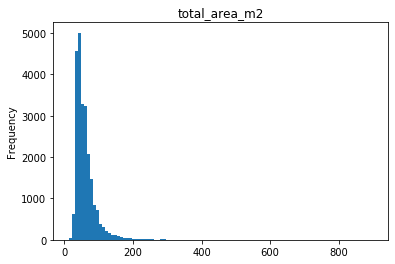

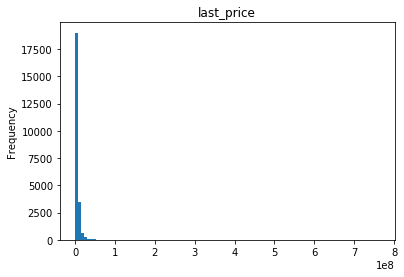

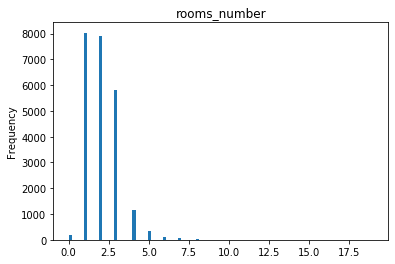

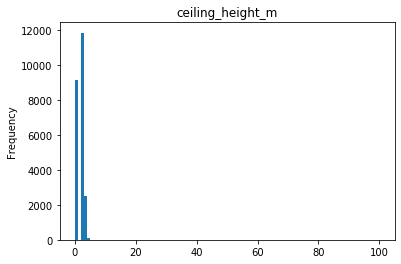

In [64]:
#построим гистограммы для всех столбцов
columns = ['total_area_m2', 'last_price', 'rooms_number', 'ceiling_height_m']
for name in columns:
    df[name].plot(title=name, kind='hist', bins=100)
    plt.show()

#### Вывод

- Вывод по площади квартир min = 12 м кв. max = 631 м кв.Средний разброс от 40 до 69 метров квадратных, что видно на графике. От 100 до 200 тоже есть квартиры. Однако выбивающиеся значения выше 250 метров кв, они встречаются редко, их даже не видно на гистрограмме. С ними позже можно будет поработать: узнать, сколько их, не ошибочные ли они, сгруппировать в отдельную категорию.


- Вывод по цене Максимальная цена: 763000000, минимальная цена: 430000, медианное значение 4950000. На гистрограмме видно, что много значений близких к нулю. И минимальное значение тоже подоздрительное. Надо выяснить, с чем это может быть связано, ошибка это или нет.


- Вывод по числу комнат С комнатами все более мение понятно. Максимальное - 19 комнат. так как до этого мы видели общую сумму квадратных метров, возможно, это не ошибка, но все же стоит проверить. Есть несколько значений у нуля - нужно узнать, что эт за значения. А так, чаще всего встречаются однокомнатные или двухкомнатыне крватиры, чуть реже трех, а все остальное по убывающей.


- Вывод по высоте потолков Высота потолков в 0 метров это наши пропуски, максимальная высота 20 м, так как на этапе предобработки мы отбросили высоту потолков больше 20 метров. По графику видно, что наибольшое колличество в промежутке от 2,5 до 2,8 метров. В целом, это отвечает стандартам. Встречаются много значений от 3 до 4 метров. Возможно, это дома в Санкт-Петербурге, где высота потолков в старых зданиях выше обычной современной застройки. При дальнейшей работе, высота потолков в 0 метров не будет учавствовать при анализе.

#### **Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

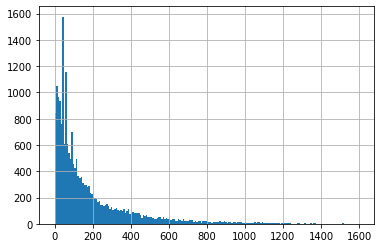

In [65]:
df['days_exposition'].hist(bins=200, range=(0, 1600))
plt.show()

In [66]:
df[['days_exposition']].describe()

,days_exposition
count,"20,470.00"
mean,180.75
std,219.78
min,1.00
25%,45.00
50%,95.00
75%,231.00
max,"1,580.00"


#### **Вывод**

Минимальное значение - два дня. Допустим, что такое может быть, тем более на гистограмме видно, что значений около 0 достаточно много. Больше вопросов у максимального значение - 1572 дня - объявление находилось на сайте больше 4 лет. Кажется не очень правдопадобным. Стоит это проверить. В целом, есть длинный хвост, после 1000 дней. Надо обратить на это внимание. Если продажа укладывается в 1 день - то это можнно считать очень быстрый разультат. Необчайно долго, если продажа заняла более приблизительно 500 дней. В среднем квартира продается за 95-200 дней.

#### **Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**

Для всех исследуемых столбцов будет использован метод boxplot. С его помощью можно определить выбивающиеся значения, и уже без них построить новый график.

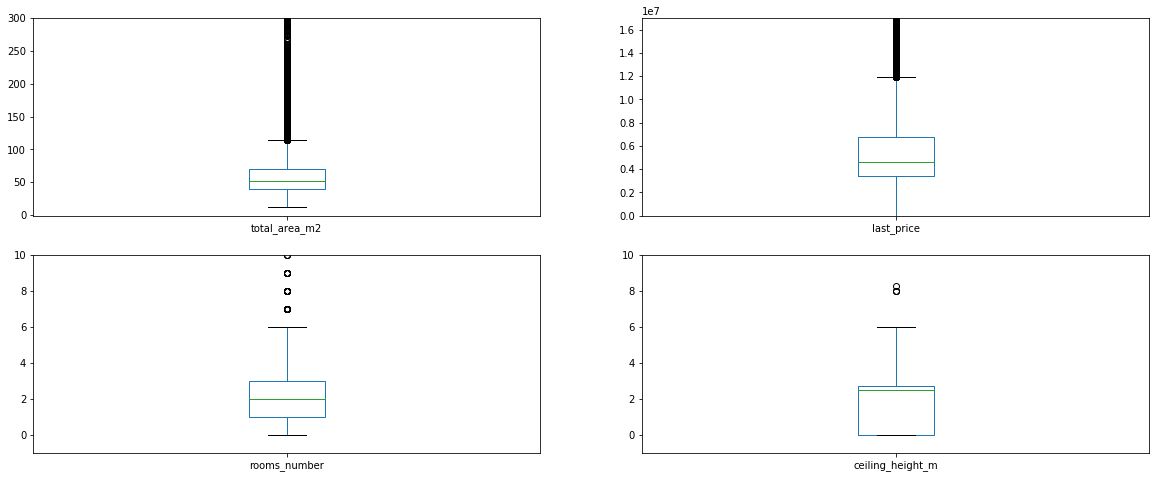

In [67]:
column_list1 = ['total_area_m2','last_price', 'rooms_number', 'ceiling_height_m']
ax = df[column_list1].plot(kind='box', subplots=True, layout=(2,2), figsize=(20,8))
ylims = [300, 17000000, 10, 10]
xlims = [1, 1, 1, 1]
for i in range(len(column_list1)):
    ax[column_list1[i]].set_ylim(-1, ylims[i], xlims[i])

Мы видим выбросы. Удалять мы их не будем, лучше ограничим таблицу, где данные будут без выбросов, и с ней поработаем. На тот случай, если выбросы все-таки нам понадобятся мы просто вернемся к предыдущей таблице.

In [68]:
#сделаем выбору без выбросов
df_cut = (
    df
    .query('12 <= total_area_m2 <= 120')
    .query('1000000 <= last_price <= 17000000')
    .query('2 <= ceiling_height_m <= 6')
    .query('1 <= rooms_number <= 6')
)

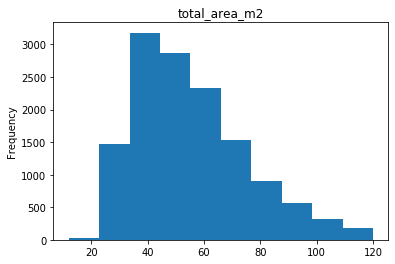

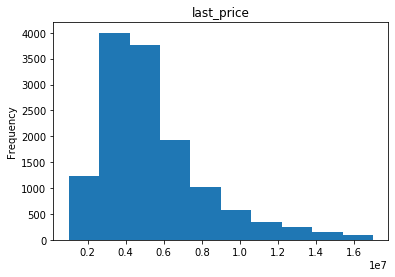

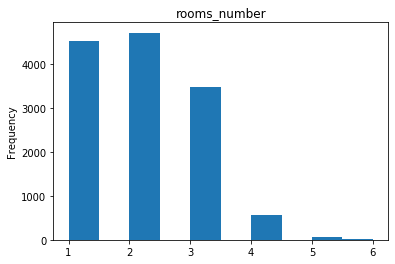

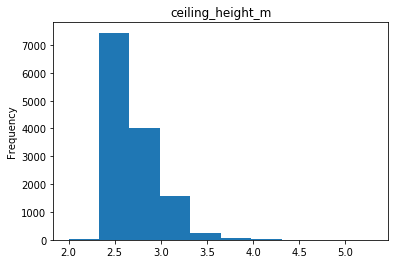

In [69]:
#посмтроим гистрограммы 
columns = ['total_area_m2', 'last_price', 'rooms_number', 'ceiling_height_m']
for name in columns:
    df_cut[name].plot(title=name, kind='hist', bins=10)
    plt.show()

Как писалось выше - удалять выбросы не будем, лучше продолжим работать с таблицой, где их нет. В дальнейшем анализ выбросов нам может пригодиться. Так, убрали крайние значение в столбцах 'total_area_m2', 'last_price', 'rooms_number', 'ceiling_height_m'. В таблице не будут учитываться пропущенные значения в столбце ceiling_height_m, так как ранее мы их заменили на 0, а теперь они не вошли в срез.

#### **Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

1. Зависимость цены от квадратного метра

In [70]:
df_cut['last_price'].corr(df_cut['total_area_m2'])

0.7411258278701878

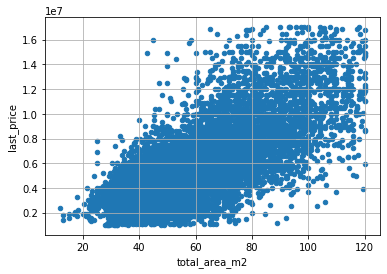

In [71]:
df_cut.plot(x='total_area_m2', y='last_price', kind='scatter', grid=True)

Логичный результат, что в таблице без выбросов прослеживается прямая корреляция цены и площади квартиры. Чем больше площадь - тем больше цена.

2. Зависимость цены от числа комнат

In [72]:
df_cut['last_price'].corr(df_cut['rooms_number'])

0.4484818103444409

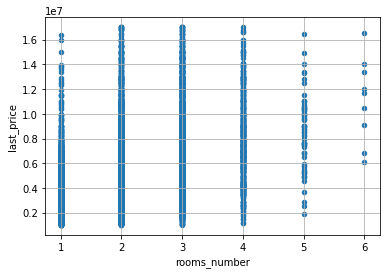

In [73]:
df_cut.plot(x='rooms_number', y='last_price', kind='scatter', grid=True)

На графике видно, что четырехкомнатная квартира может стоить столько же, сколько и однокомнатная. Значимой зависимости не обнаружено.

3. Зависимость цены от удаленности от центра

In [74]:
df_cut['last_price'].corr(df_cut['city_center_distance_km'])

-0.3514280868796664

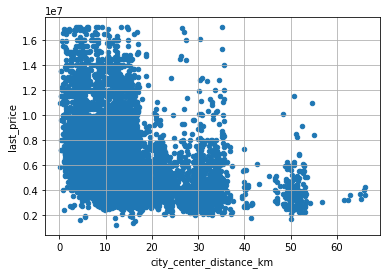

In [75]:
df_cut.plot(x='city_center_distance_km', y='last_price', kind='scatter', grid=True)

Как и ожидалось, есть незначительная обратная зависимость, чем больше расстояние до центра, тем ниже цена. 

4. Зависимость цены от этажа квартиры: первый, последний или другой

In [76]:
df_cut['last_price'].corr(df_cut['floor_cat'] == 'первый')

-0.12172599920491661

In [77]:
df_cut['last_price'].corr(df_cut['floor_cat'] == 'последний')

-0.04097160098243163

In [78]:
df_cut['last_price'].corr(df_cut['floor_cat'] == 'другой')

0.12397678650727248

Зависимость минимальая. Но даже в этих минимальных значениях есть интересные данные: что у квартир, которые находятся на первом и последнем этажах обратная зависимость. Значит, что квартиры на первом и последнем этажах дешевле квартир на остальных этажах.

5. Зависимость цены от дня размещения объявления

Text(0.5, 1.0, 'Зависимость цены от дня размещения объявления')

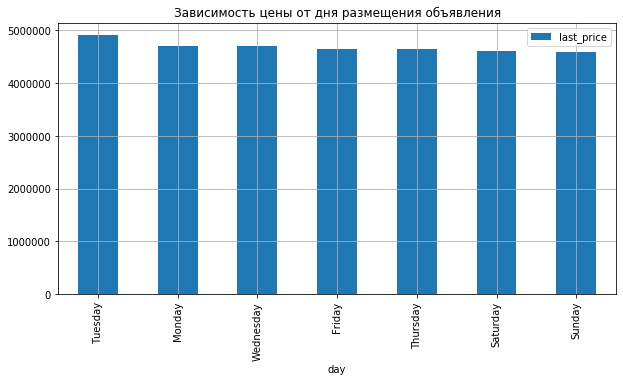

In [79]:
df_cut.pivot_table(index='day', values='last_price', aggfunc='median').sort_values('last_price',ascending=False).plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('Зависимость цены от дня размещения объявления')

In [80]:
df_day = df_cut.pivot_table(index='day', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False).reset_index()
df_day.columns = ['weekday', 'count', 'median']
df_day

,weekday,count,median
0,Tuesday,2449,4900000
1,Monday,2189,4700000
2,Wednesday,2204,4700000
3,Friday,2129,4650000
4,Thursday,2395,4650000
5,Saturday,1091,4600000
6,Sunday,920,4595000


Ни график, ни группировка данных по дням недели с рассчетам медианы не показали зависимость стоимости квартиры от дня размещения объявления.

6. Зависимость цены от месяца размещения объявления

Text(0.5, 1.0, 'Зависимость цены от месяца размещения объявления')

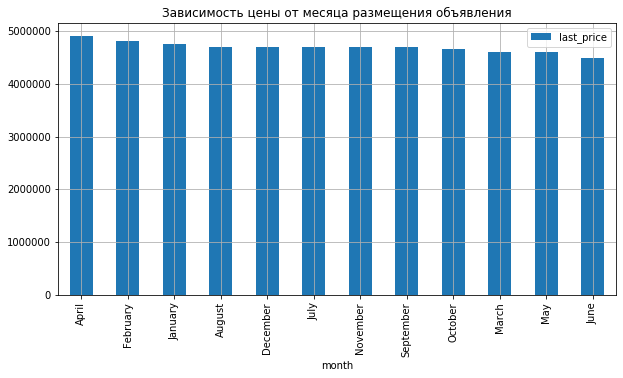

In [81]:
df_cut.pivot_table(index='month', values='last_price', aggfunc='median').sort_values('last_price', ascending=False).plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('Зависимость цены от месяца размещения объявления')

In [82]:
df_month = df_cut.pivot_table(index='month', values='last_price', aggfunc=('count', 'median')).sort_values('median', ascending=False).reset_index()
df_month.columns = ['month', 'count', 'median']
df_month

,month,count,median
0,April,1388,4900000
1,February,1562,4800000
2,January,838,4750000
3,August,1015,4700000
4,December,852,4700000
5,July,965,4700000
6,November,1307,4700000
7,September,1116,4700000
8,October,1241,4650000
9,March,1605,4600000


Месяц, в котором были размещены объявления с самыми дорогими квартирами - апрель.

Ни график, ни группировка данных по месяцам с рассчетам медианы не показали зависимость
стоимости квартиры от месяца размещения объявления.

6. Зависимость цены от года размещения объявления

Text(0.5, 1.0, 'Зависимость цены от года размещения объявления')

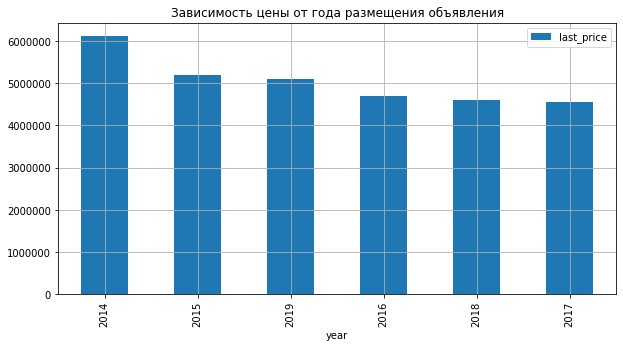

In [83]:
df_cut.pivot_table(index='year', values='last_price', aggfunc='median').sort_values('last_price', ascending=False).plot(kind='bar', grid=True, figsize=(10, 5))
plt.title('Зависимость цены от года размещения объявления')

In [84]:
df_year = df_cut.pivot_table(index='year', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False).reset_index()
df_year.columns = ['year', 'count', 'median']
df_year

,year,count,median
0,2014,56,6125625
1,2015,515,5200000
2,2019,2050,5100000
3,2016,1250,4690000
4,2018,5430,4600000
5,2017,4076,4550000


И график, и группировка данных по году с рассчетам медианы показали, что в 2014 году были размещены объявления с самой высокой стоимостью квартир. Это можно связать с экономической ситуацией в стране. В четвертом квартале 2014 года в России начался
Валютный кризис (Резкое ослабление российского рубля по отношению к иностранным валютам). 
Покупательная способность населения уменьшилась.

Но замечу, что количество продаваемых квартир на порядок меньше нежели в более поздних годах, этому может быть несколько обьяснений:

1. Сервис начал свою работу в конце 2014
2. Данные за 2014 были потеряны или некорректно выгружены.

В любом случае, количество квартир за 2014 год это слишком маленькая выборка, по которой можно было бы делать вывод
по целому году.

#### **Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.**

In [85]:
df['city_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: city_name, dtype: int64

In [86]:
mean_price_m2 = df.pivot_table(index='city_name', values='price_m2', aggfunc=['count', 'mean'])
mean_price_m2.columns = ['count', 'mean']
mean_price_m2.sort_values('count', ascending=False).head(10)

,count,mean
city_name,,
санкт-петербург,15721,"114,849.01"
поселок мурино,556,"85,681.76"
поселок шушары,440,"78,677.36"
всеволожск,398,"68,654.47"
пушкин,369,"103,125.82"
колпино,338,"75,424.58"
поселок парголово,327,"90,175.91"
гатчина,307,"68,746.15"
деревня кудрово,299,"92,473.55"


#### **Вывод**

Как и ожидалось наибольшее количество продаваемых квартир находится в Санкт-Петербурге со средней стоимостью 115т. руб. за м2, что касается самого малого количества объявлений это Выборг, по нему средняя стоимость за м2 составляет 58т. руб.. То есть в Питере квартиры стоят в 2 раза дороже чем в Выборге.

#### **Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.**

In [87]:
df.head()

,city_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,floor,floors_total,rooms_number,balcony_number,is_apartment,is_studio,is_open_plan,first_day_exposition,days_exposition,last_price,total_images,parks_number_3km,ponds_number_3km,city_center_distance_km,airports_distance_km,parks_distance_km,ponds_distance_km,price_m2,day,month,year,floor_cat,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,8,16.00,3,0,False,False,False,2019-03-07,nan,13000000,20,1,2,16.03,18.86,0.48,0.76,"120,370.37",Thursday,March,2019,другой,0.47,0.23
1,поселок шушары,40.40,18.60,11.00,0.00,1,11.00,1,2,False,False,False,2018-12-04,81.00,3350000,7,0,0,18.60,12.82,nan,nan,"82,920.79",Tuesday,December,2018,первый,0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,0.00,4,5.00,2,0,False,False,False,2015-08-20,558.00,5196000,10,1,2,13.93,21.74,0.09,0.57,"92,785.71",Thursday,August,2015,другой,0.61,0.15
3,санкт-петербург,159.00,nan,nan,0.00,9,14.00,3,0,False,False,False,2015-07-24,424.00,64900000,0,2,3,6.80,28.10,0.08,0.23,"408,176.10",Friday,July,2015,другой,nan,nan
4,санкт-петербург,100.00,32.00,41.00,3.03,13,14.00,2,0,False,False,False,2018-06-19,121.00,10000000,2,2,1,8.10,31.86,0.11,0.05,"100,000.00",Tuesday,June,2018,другой,0.32,0.41


In [88]:
#округлим до целых чисел
df_cut['city_center_distance_km'] = df_cut['city_center_distance_km'].round()

In [89]:
#выделим квартиры в Питере
s_petersburg = (
    df_cut
    .query('city_name in ("санкт-петербург")')
    .loc[:, ('city_center_distance_km', 'last_price', 'total_area_m2', 'rooms_number', 'ceiling_height_m', 'floor_cat', 'day', 'month', 'year')]
)

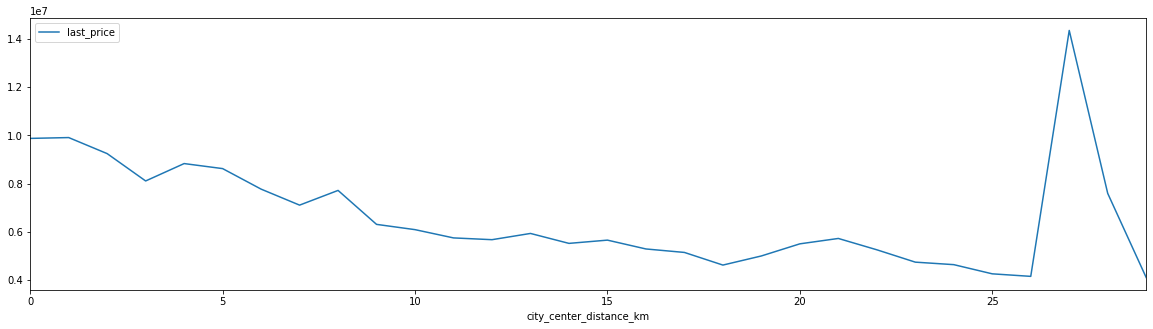

In [90]:
s_petersburg_price_km = (
    s_petersburg
    .pivot_table(index='city_center_distance_km', values='last_price', aggfunc=('mean'))
)
s_petersburg_price_km.plot(figsize=(20, 5))

In [91]:
s_petersburg_price_km.query('25 <= city_center_distance_km <= 30')

,last_price
city_center_distance_km,
25.00,"4,267,500.00"
26.00,"4,162,600.00"
27.00,"14,350,000.00"
28.00,"7,600,000.00"
29.00,"4,114,000.00"


На графике видно, что цена резко снижается к 8 км от центра. Рассмотрим отрецоз в 8 км до центра отдельно. Есть выбивающееся значение на 28 км, для анализа центра оно не пригодится.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В точку, потому что после данного километра происходит длительная стагнация стоимости квартиры.
    
</div>

(0, 10)

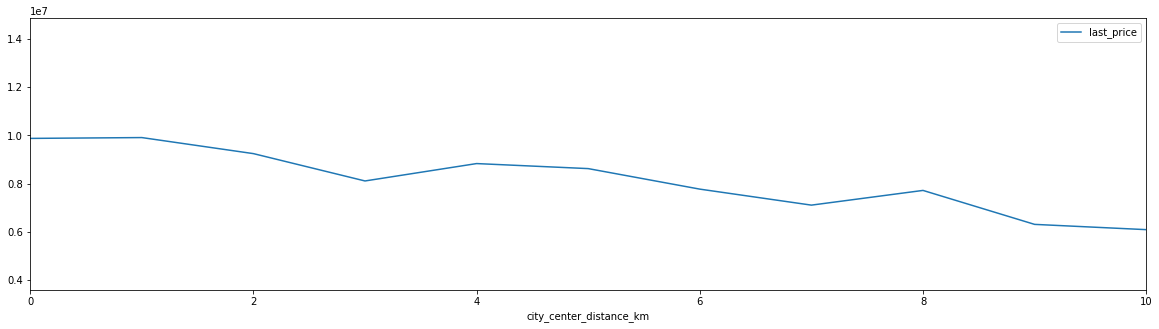

In [92]:
s_petersburg_price_km.plot(figsize=(20, 5))
plt.xlim(0, 10)

На это графике уже виднее, что самое высокое значение у 0 км от центра. Далее идет спад к 3 км и потом плато до 8 км и опять спад. Возьмем за основу, что центральная часть Санк-Петербурга это радиус 8 км от центра.

#### **Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?**

In [93]:
s_petersburg_center = (
    s_petersburg
    .query('city_center_distance_km <= 8')
    .loc[:, ('city_center_distance_km', 'last_price', 'total_area_m2', 'rooms_number', 'ceiling_height_m', 'floor_cat', 'day', 'month', 'year')]
)
s_petersburg_center.head(10)

,city_center_distance_km,last_price,total_area_m2,rooms_number,ceiling_height_m,floor_cat,day,month,year
4,8.00,10000000,100.00,2,3.03,другой,Tuesday,June,2018
94,7.00,3500000,29.50,1,2.50,другой,Friday,April,2019
114,6.00,4000000,21.40,1,2.90,другой,Thursday,February,2019
136,4.00,6500000,51.80,2,3.45,другой,Wednesday,August,2018
137,4.00,13310800,85.10,2,2.70,другой,Monday,January,2018
143,6.00,2990000,30.00,1,2.50,последний,Wednesday,June,2016
145,7.00,8290000,77.00,2,2.77,другой,Monday,September,2015
154,3.00,8200000,80.00,3,4.15,другой,Tuesday,November,2018
159,5.00,7050000,66.00,3,3.00,последний,Monday,September,2017
179,3.00,14800000,108.70,3,4.00,последний,Thursday,April,2019


In [94]:
print(s_petersburg_center['total_area_m2'].describe())
print(s_petersburg['total_area_m2'].describe())

count   1,997.00
mean       68.77
std        22.65
min        12.00
25%        50.00
50%        68.00
75%        85.00
max       120.00
Name: total_area_m2, dtype: float64
count   9,162.00
mean       57.18
std        20.51
min        12.00
25%        41.77
50%        53.20
75%        69.70
max       120.00
Name: total_area_m2, dtype: float64


Квартиры в центре в среднем больше на 10 кв.м.

In [95]:
print(s_petersburg_center['last_price'].describe())
print(s_petersburg['last_price'].describe())

count        1,997.00
mean     8,297,490.24
std      3,091,925.74
min      1,600,000.00
25%      6,000,000.00
50%      7,800,000.00
75%     10,000,000.00
max     17,000,000.00
Name: last_price, dtype: float64
count        9,162.00
mean     6,215,429.30
std      2,782,296.20
min      1,200,000.00
25%      4,250,000.00
50%      5,400,000.00
75%      7,400,000.00
max     17,000,000.00
Name: last_price, dtype: float64


Средняя стоимость квартир в центре - 8,3млн, это больше на 2млн, чем в среднем по всему городу.

In [96]:
print(s_petersburg_center['rooms_number'].describe())
print(s_petersburg['rooms_number'].describe())

count   1,997.00
mean        2.40
std         0.97
min         1.00
25%         2.00
50%         2.00
75%         3.00
max         6.00
Name: rooms_number, dtype: float64
count   9,162.00
mean        2.06
std         0.92
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         6.00
Name: rooms_number, dtype: float64


Больше всего 2-х комнатных квартир, если рассматривать средние значения, то количество комнат в квартирах в центре меньше чем в общем по городу.

In [97]:
print(s_petersburg_center['ceiling_height_m'].describe())
print(s_petersburg['ceiling_height_m'].describe())

count   1,997.00
mean        2.99
std         0.34
min         2.00
25%         2.75
50%         3.00
75%         3.20
max         5.30
Name: ceiling_height_m, dtype: float64
count   9,162.00
mean        2.73
std         0.26
min         2.00
25%         2.54
50%         2.65
75%         2.80
max         5.30
Name: ceiling_height_m, dtype: float64


Как ожидалось, высота потолков выше в центре, скорее всего это связано с тем, что это здания старой постройки.

In [98]:
#посмтроим корреляцию для числовых значений для центра
s_petersburg_center.corr()

,city_center_distance_km,last_price,total_area_m2,rooms_number,ceiling_height_m,year
city_center_distance_km,1.00,-0.19,-0.23,-0.20,-0.37,0.09
last_price,-0.19,1.00,0.70,0.41,0.26,-0.03
total_area_m2,-0.23,0.70,1.00,0.78,0.31,-0.11
rooms_number,-0.20,0.41,0.78,1.00,0.21,-0.06
ceiling_height_m,-0.37,0.26,0.31,0.21,1.00,-0.05
year,0.09,-0.03,-0.11,-0.06,-0.05,1.00


In [99]:
#посмтроим корреляцию для числовых значений для всего города
s_petersburg.corr()

,city_center_distance_km,last_price,total_area_m2,rooms_number,ceiling_height_m,year
city_center_distance_km,1.00,-0.39,-0.26,-0.18,-0.51,0.08
last_price,-0.39,1.00,0.81,0.49,0.47,-0.02
total_area_m2,-0.26,0.81,1.00,0.78,0.39,-0.10
rooms_number,-0.18,0.49,0.78,1.00,0.16,-0.05
ceiling_height_m,-0.51,0.47,0.39,0.16,1.00,-0.10
year,0.08,-0.02,-0.10,-0.05,-0.10,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f045bca90>,
      dtype=object)

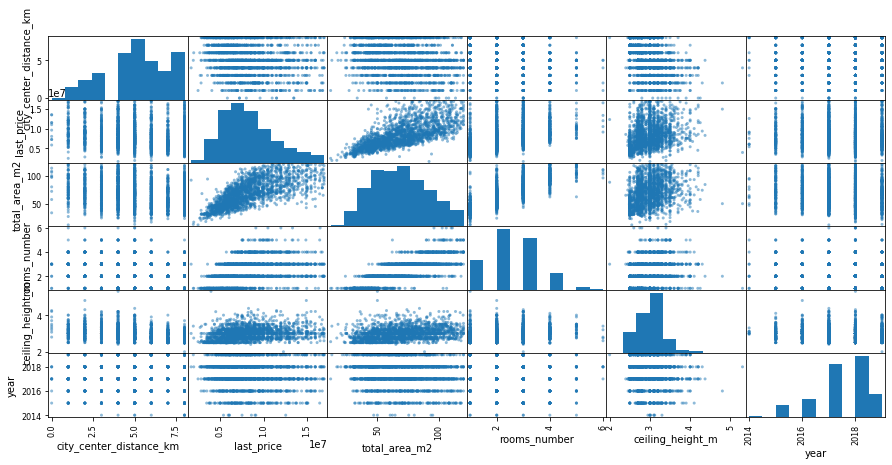

In [100]:
#построим матрицу корреляции по выборке из центра
pd.plotting.scatter_matrix(
    s_petersburg_center
    ,alpha=0.5
    ,figsize=(15,7)
    ,grid = True
)

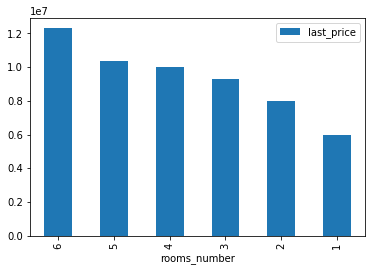

In [101]:
#посмотрим на графике сводной таблицы и отследим зависимость стоимости квартиры от количества комнат
s_petersburg_center_room = s_petersburg_center.pivot_table(index='rooms_number', values='last_price', aggfunc='mean').sort_values('last_price',ascending=False)
s_petersburg_center_room.plot(y='last_price', kind='bar')

Как и ожидалось чем больше комнат, тем выше стоимость.
Вывод - количество комнат влияет на стоимость квартиры.

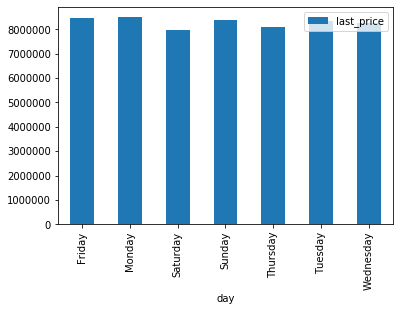

In [102]:
#посмотрим на графике сводной таблицы и отследим зависимость стоимости квартиры от дня размещения
s_petersburg_center_day = s_petersburg_center.pivot_table(index='day', values='last_price', aggfunc='mean')
s_petersburg_center_day.plot(y='last_price', kind='bar')

Есть небольшая разница, в субботу и вторник объявления размещают меньше.

Но нельзя сделать вывод, что данный фактор влияет на стоимость квартиры, так как она может продаваться от месяца до нескольких лет.

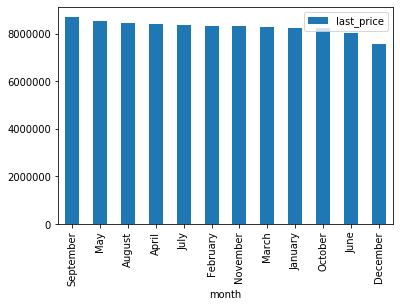

In [103]:
#посмотрим на графике сводной таблицы и отследим зависимость стоимости квартиры от месяца размещения 
s_petersburg_center_month = s_petersburg_center.pivot_table(index='month', values='last_price', aggfunc='mean').sort_values('last_price',ascending=False)
s_petersburg_center_month.plot(y='last_price', kind='bar')

В целом есть небольшая засимость квартире в сентябре стоят дороже, а в декабре меньше, возможно это связанно с предновогодними праздниками.

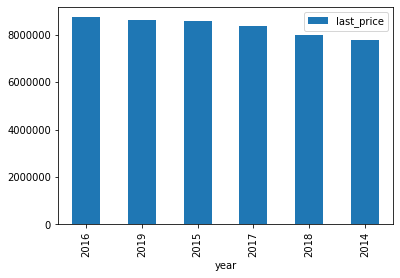

In [104]:
#посмотрим на графике сводной таблицы и отследим зависимость стоимости квартиры от году размещения
s_petersburg_center_year = s_petersburg_center.pivot_table(index='year', values='last_price', aggfunc='mean').sort_values('last_price',ascending=False)
s_petersburg_center_year.plot(y='last_price', kind='bar')

2015, 2016, 2019 выделяются, в эти года квартиры стоили дороже всего.
Большие значения 2014 года не попали в выборку скорее всего из-за группировки.

### Шаг 5. Общий вывод

**Ознакомились с данными**

- Была проведена работа с полученными данными. 
- После изучения df были найдены пропуски. 
- В столбцах, где это было возможно, они были заполнены.

**Предобработка данных**

- Изменили названия столбцов для удобства работы
- заменили пропуски в балконах на 0
- избавились от возможных дубликатов в столбце с городом и удалили пропуски
- заменили пропуски в столбце с апартаментами на False
- заменили столбцы с расстоянием до центра, аэропорта, парка и водоема из метров в километры
- убрали аномальные выбросы в столбце с высотой потолков
- перевели столбцы в целочисленный тип с вещественного где это возможно для удобства работы
- перевели столбец с датой в тип datetime для дальнейшей работы с ним

**Сделали столбцы**
    
- с ценой за квадратный метр
- с днем недели, месяцом и годом публикации объявления
- с категоризацией этажей 
- с соотношением жилой и общей площади, а также отношение площади кухни к общей

**Выводы**

Далее мы посмотрели на выбросы. Чтобы сохранить данные для дальнейшей работы, было решено от их не удалять, а сделать новую таблицу без выбросов. И продолжить работу с ней. Уже на основе данный в таблице df_cut был проведен анализ по ценообразованию.

Самое большое влияение на стоимость квартиры имеет площадь этой самой квартиры. 

Зависимость прямая: чем больше площадь, тем выше цена. 

В городе Санкт-Петербурге, в цетре (радиус 8 км) а так же во всем городе не выявлено сильного влияния от расположенности к центру. Да, чем дальше от центра, тем квартира дешевле, но не значимо. Чуть больше влияния на ценообразование оказывает колличество комнат и высота потолков по всему городу, а не конкретно в центре. Но все равно значимыми параметроми их назвать нельзя. Дата размещения так же не особо влияет на стоимость квартиры, единственный момент, что в 2014 по общему датафрейму были выявленые большие цены на квартиры, но это может быть связано с тем, что мы имеет малое количество данных.
Этаж немного влияет на стоимость квартиры - на первом и последнем этаже квартиры как правило дешевле.

Можно сделать вывод, что основной параметр в ценообразовании - это площадь продаваемой квартиры, потом колличество комнат, высота потолков, близость к центру и уже после этаж.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод